<br>
<p style="text-align: center;"><font size=6><b>EAE1106 - Métodos Computacionais para Economistas</b></font></p>

<p style="text-align: center;"> Departamento de Economia | Faculdade de Economia, Administração, Contabilidade e Atuaria <br> Universidade de São Paulo <br><br></p>
    
<p style="text-align: center;"><font size=4>Prof. Danilo Souza e Prof. Claudio Lucinda</font> <br>
    <a href="https://www.danilosouza.com/teaching/eae1106">danilosouza.com/teaching/eae1106</a> | <a href="https://github.com/claudiolucinda/EAE1106">github.com/claudiolucinda/EAE1106</a>
    <br><br>
</p>


<p style="text-align: center;">2º semestre de 2022</p>
<hr>

<font size=6><b>Aula 12 e Aula 13 </b></font>
<br><br>

Depois de aprender muito sobre como trabalhar com bases de dados no Pandas, é preciso aprender ferramentas que nos permitam **visualizar** os resultados proveninentes da nossa análise. São muitas as bibliotecas no Python dedicadas à visualização, nesse curso trabalharemos com uma das mais famosas entre todas as disponíveis: **Matplotlib**.

<h1>Plano de aula<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#O-que-é-o-Matplotlib?" data-toc-modified-id="O-que-é-o-Matplotlib?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>O que é o Matplotlib?</a></span></li><li><span><a href="#Construindo-nosso-1º-gráfico" data-toc-modified-id="Construindo-nosso-1º-gráfico-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Construindo nosso 1º gráfico</a></span><ul class="toc-item"><li><span><a href="#Base-de-dados" data-toc-modified-id="Base-de-dados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base de dados</a></span></li><li><span><a href="#Função-plot" data-toc-modified-id="Função-plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Função <em>plot</em></a></span></li></ul></li><li><span><a href="#Gráficos-personalizados" data-toc-modified-id="Gráficos-personalizados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gráficos personalizados</a></span></li><li><span><a href="#Gráficos-múltiplos" data-toc-modified-id="Gráficos-múltiplos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gráficos múltiplos</a></span><ul class="toc-item"><li><span><a href="#Várias-séries-em-um-mesmo-plot" data-toc-modified-id="Várias-séries-em-um-mesmo-plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Várias séries em um mesmo <em>plot</em></a></span></li><li><span><a href="#Vários-plots-dentro-da-mesma-figura" data-toc-modified-id="Vários-plots-dentro-da-mesma-figura-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Vários <em>plots</em> dentro da mesma figura</a></span></li></ul></li><li><span><a href="#Outros-tipos-de-gráficos" data-toc-modified-id="Outros-tipos-de-gráficos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outros tipos de gráficos</a></span><ul class="toc-item"><li><span><a href="#Gráfico-de-dispersão:-scatter" data-toc-modified-id="Gráfico-de-dispersão:-scatter-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gráfico de dispersão: <em>scatter</em></a></span></li><li><span><a href="#Gráfico-de-barra:-bar-e-barh" data-toc-modified-id="Gráfico-de-barra:-bar-e-barh-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Gráfico de barra: <em>bar</em> e <em>barh</em></a></span></li><li><span><a href="#Histograma:-hist" data-toc-modified-id="Histograma:-hist-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Histograma: <em>hist</em></a></span></li></ul></li><li><span><a href="#Visualização-e-storytelling" data-toc-modified-id="Visualização-e-storytelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualização e <em>storytelling</em></a></span></li></ul></div>

***

# O que é o Matplotlib?

Matplotlib é uma excelente biblioteca de ferramentas gráficas, projetada para computação científica, que nos permite um grau bastante alto de personalização sobre todos os aspectos da apresentação. Nos permite construir visualizações estáticas em 2D e 3D e exportá-las nos mais diferentes formatos. Embora existam outras bibliotecas (e.g., [altair](https://altair-viz.github.io/), [bokeh](https://bokeh.org/), [plotly](https://plotly.com/python/)) que nos permitam construir visualizações dinâmicas e mais complexas, o Matplotlib é uma excelente primeira abordagem no campo de visualização de dados dentro do Python. Para a esmagadora maioria de nossas aplicações, é essa biblioteca que iremos buscar primeiro.

# Construindo nosso 1º gráfico

## Base de dados

O primeiro passo, como sempre, é importar as funções da biblioteca que iremos utilizar. No caso do matplotlib, em geral estamos interessados no módulo `pyplot`.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Em relação aos dados, utilizaremos mais uma vez a base com informações relacionadas a covid-19 nos 10 países com o maior número de casos acumulados. Dessa vez, no entanto, nos concentraremos em algumas poucas colunas e na agregação mensal.

In [2]:
os.chdir(r'G:/Meu Drive/Aulas/FEA/Métodos Computacionais/EAE1106')

columns_to_read = ['location',
                   'date',
                   'total_cases',
                   'new_cases',
                   'total_deaths',
                   'new_deaths',
                   'population',
                   'people_fully_vaccinated',
                   'median_age',
                   'aged_65_older',
                   'cardiovasc_death_rate',
                   'diabetes_prevalence']

df_covid = pd.read_csv('owid-covid-data_top10.csv', sep=',', encoding='utf8',usecols=columns_to_read)
df_covid['ano_mes'] = df_covid['date'].str[0:7]

df_covid_mensal = df_covid.groupby(by=['location','ano_mes'], as_index=False).agg(total_cases=('total_cases', 'max'),
                                                                                  new_cases=('new_cases', 'sum'),
                                                                                  total_deaths=('total_deaths', 'max'),
                                                                                  new_deaths=('new_deaths', 'sum'),
                                                                                  population=('population', 'mean'),
                                                                                  people_vaccinated=('people_fully_vaccinated', 'max'),
                                                                                  median_age=('median_age', 'mean'),
                                                                                  aged_65_older=('aged_65_older', 'mean'),
                                                                                  cardiovasc_death_rate=('cardiovasc_death_rate', 'mean'),
                                                                                  diabetes_prevalence=('diabetes_prevalence', 'mean'))

df_covid_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               269 non-null    object 
 1   ano_mes                269 non-null    object 
 2   total_cases            269 non-null    float64
 3   new_cases              269 non-null    float64
 4   total_deaths           255 non-null    float64
 5   new_deaths             269 non-null    float64
 6   population             269 non-null    float64
 7   people_vaccinated      145 non-null    float64
 8   median_age             269 non-null    float64
 9   aged_65_older          269 non-null    float64
 10  cardiovasc_death_rate  269 non-null    float64
 11  diabetes_prevalence    269 non-null    float64
dtypes: float64(10), object(2)
memory usage: 25.3+ KB


In [3]:
pd.set_option('display.max_rows',300)
df_covid_mensal

,location,ano_mes,total_cases,new_cases,total_deaths,new_deaths,population,people_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,NaN,0.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
5,Brazil,2020-07,2670451.0,1257782.0,92728.0,32936.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
6,Brazil,2020-08,3914829.0,1244378.0,121618.0,28890.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
7,Brazil,2020-09,4817365.0,902536.0,144078.0,22460.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
8,Brazil,2020-10,5537763.0,720398.0,159972.0,15894.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11
9,Brazil,2020-11,6341965.0,804202.0,173268.0,13296.0,2.139934e+08,NaN,33.5,8.552,177.961,8.11


Note que temos alguns problemas com valores missing, vamos nesse casos substituí-los por zero.

In [4]:
df_covid_mensal.fillna(0,inplace=True)
df_covid_mensal

,location,ano_mes,total_cases,new_cases,total_deaths,new_deaths,population,people_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
5,Brazil,2020-07,2670451.0,1257782.0,92728.0,32936.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
6,Brazil,2020-08,3914829.0,1244378.0,121618.0,28890.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
7,Brazil,2020-09,4817365.0,902536.0,144078.0,22460.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
8,Brazil,2020-10,5537763.0,720398.0,159972.0,15894.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11
9,Brazil,2020-11,6341965.0,804202.0,173268.0,13296.0,2.139934e+08,0.0,33.5,8.552,177.961,8.11


## Função _plot_

Com o dataframe criado, podemos plotar o número total de novos casos no Brasil ao longo do tempo usando uma única função: `plot`. Essa função recebe como argumento os valores do eixo `x` (no nosso caso a data) e do eixo `y` (número de novos casos) e nos devolve um gráfico de linha relacionando esses dois conjuntos de dados. Por fim é preciso chamar a função `show()` para mostrar o gráfico que criamos.

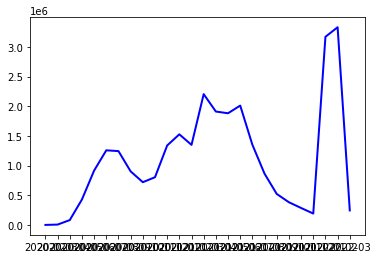

In [5]:
df_covid_br = df_covid_mensal[df_covid_mensal['location'].isin(['Brazil'])].reset_index(drop=True)

x = df_covid_br['ano_mes']
y = df_covid_br['new_cases']

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

O gráfico tá feito, mas ficou um pouco feio. Como podemos melhorar?

* Ajustar o que mostramos no eixo X.
* Ajustar a escala do eixo Y.
* Mudar a cor da linha para algo mais agradável.
* Colocar um marcador em cada ponto de dado.
* Adicionar título ao gráfico.

Primeiro, é importante conhecer os nossos dados em todas as linhas.

In [6]:
df_covid_br[['ano_mes','new_cases']]

,ano_mes,new_cases
0,2020-02,2.0
1,2020-03,5715.0
2,2020-04,81470.0
3,2020-05,428950.0
4,2020-06,916328.0
5,2020-07,1257782.0
6,2020-08,1244378.0
7,2020-09,902536.0
8,2020-10,720398.0
9,2020-11,804202.0


Agora podemos usar algumas opções e métodos sobre o `plot` que criamos dentro da célula para aplicar todas essas alterações sugeridas.

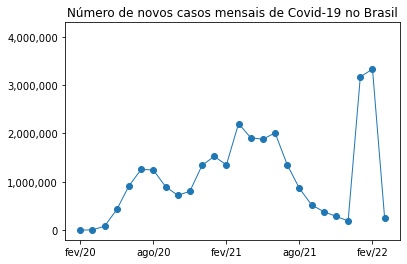

In [7]:
x_ticks = [0,6,12,18,24]
x_labels = ['fev/20','ago/20','fev/21','ago/21','fev/22']
y_ticks = [0,1000000,2000000,3000000,4000000]
y_labels = ['0','1,000,000','2,000,000','3,000,000','4,000,000']


plt.plot(x, y, color='#1f77b4', linewidth=1, marker='o')
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.ylim([-200000, 4300000])
plt.title('Número de novos casos mensais de Covid-19 no Brasil')
plt.show()

Bem melhor né? Mas ainda dá para melhorar **muito**!

Uma das belezas do Python é sua lógica de programação multiparadigma, o que nos permite trabalhar também com a lógica orientada a objetos. Isso não é diferente com gráficos. 

No método que acabamos de utilizar, muitos dos objetos que compõe o gráfico como um todo (eixos, fundo, bordas, etc.) são criados e transmitidos sem se tornarem conhecidos pelo programador. Em geral é preferível um estilo de programação mais explícito, sob o qual teríamos mais controle sobre as várias dimensões do gráfico. E é assim que trabalharemos com gráficos daqui para frente.

# Gráficos personalizados

Vamos começar refazendo o primeiro gráfico, antes das alterações na escala e cores.

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Legal, mas o que significam todas essas coisas?

Começamos utilizando a função `subplots()` do `matplotlib.pyplot`, que nos retorna dois objetos aos quais damos os nomes de `fig` e `ax`. Sem entrar nos detalhes de classes e instâncias da lógica de programação orientada a objetos no Python:

* `fig` é como se fosse um fundo branco.
* Pense em `ax` como sendo uma forma de iniciar um quadro sobre o qual construiremos a figura.

In [ ]:
fig, ax = plt.subplots()

fig.set_facecolor("red")
ax.set_facecolor("blue")

plt.show()

Em essência, a função `plot()` é na verdade um método de `ax`.

Embora fazer esse gráfico simples dessa forma exija um pouco mais de código, o uso explícito de objetos nos dá melhor controle sobre a aparência do objeto e de todas as personalizações possíveis. Isso ficará mais claro à medida que avançarmos.

Como replicar o 2º gráfico da seção anterior usando essa lógica orientada a objetos?

In [ ]:
x_ticks = [0,6,12,18,24]
x_labels = ['fev/20','ago/20','fev/21','ago/21','fev/22']
y_ticks = [0,1000000,2000000,3000000,4000000]
y_labels = ['0','1,000,000','2,000,000','3,000,000','4,000,000']


fig, ax = plt.subplots()

ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_ylim(-200000, 4300000)

plt.title('Número de novos casos mensais de Covid-19 no Brasil')
plt.show()

Foram várias linhas de código a mais com essa abordagem mais orientada a objeto, mas que no fim nos permite muito mais personalizações. Vamos tentar deixá-lo ainda melhor?

A ideia por trás de uma figura é sempre a mesma: transmitir alguma informação de forma clara e direta. Seguindo essa ideia e partindo do gráfico inicial, vamos fazer mais algumas alterações uma a uma e ir comparando os resultados.

* Mudar a proporção do gráfico e manter a borda apenas do eixo X

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Tipo de gráfico a ser plotado
ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o', markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Mostrar o resultado
plt.show()

* Colocar linhas de grid para os valores de Y

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Tipo de gráfico a ser plotado
ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o', markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Mostrar o resultado
plt.show()

* Mudar os marcadores do eixo x e do eixo y como já havíamos feito.

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Tipo de gráfico a ser plotado
ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o', markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites dos eixos
ax.set_xlim(-1, 26)
ax.set_ylim(-200000, 4300000)

# Mostrar o resultado
plt.show()

* Adicionar uma linha de referência que representa a média do número de casos ao longo do tempo.

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Tipo de gráfico a ser plotado
ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o', markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites dos eixos
ax.set_xlim(-1, 26)
ax.set_ylim(-200000, 4300000)

# Linha de referência
ax.plot([-1, 26], [y.mean(), y.mean()], 'r--', lw=1.0)
ax.annotate('Média de novos casos\nmensais: {:,.0f}'.format(y.mean()),xy=(-1, 1.10*y.mean()),fontsize=9.5,color='r',fontweight='normal',style='italic')

# Mostrar o resultado
plt.show()

* Deixar o título maior e um pouco afastado do início da figura, juntamente com a fonte dos dados logo abaixo.
* Salvar a figura em formato .png

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Tipo de gráfico a ser plotado
ax.plot(x, y, color='#1f77b4', linewidth=1, marker='o', markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites dos eixos
ax.set_xlim(-1, 26)
ax.set_ylim(-200000, 4300000)

# Linha de referência
ax.plot([-1, 26], [y.mean(), y.mean()], 'r--', lw=1.0)
ax.annotate('Média de novos casos\nmensais: {:,.0f}'.format(y.mean()),xy=(-1, 1.10*y.mean()),fontsize=9.5,color='r',fontweight='normal',style='italic')

# Título e fonte
plt.suptitle('Número de novos casos mensais de COVID19 - Brasil',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('casos_covid_br.png', bbox_inches='tight')
plt.show()

Uau, que diferença! Foram muitas linhas de código, mas esse é o preço de um bom gráfico e de uma boa visualização. O controle sobre todos os elementos que compõe uma figura é essencial para que possamos cumprir com o objetivo de tornar visualizações cada vez mais informativas e democráticas.

# Gráficos múltiplos

Uma vez aprendida a forma de construção de um gráfico através da função `subplot()` é bastante trivial construir figuras que contenham várias séries em um mesmo plot ou vários plots na mesma figura. Vamos começar pelo caso mais simples.

## Várias séries em um mesmo _plot_

Uma vez em posse dos dados de casos de covid-19 por país, uma pergunta que surge naturalmente é: como o número de casos reportados diferiu entre os diferentes países? Um aluno bem atento teria notado que no último gráfico da sessão anterior já havíamos juntado duas séries em um mesmo plot, sendo uma dessas séries a reta horizontal que representa a média de novos casos. Mas então basta adicionar mais uma linha de código com um segundo `ax.plot()`? É isso aí!

Para essa análise vamos primeiro criar a coluna `new_cases_per_million`, já que comparar o número absoluto de casos entre países com populações muito distintas pode não ser a melhor saída.

In [5]:
df_covid_mensal['new_cases_per_million'] = (df_covid_mensal['new_cases'] / df_covid_mensal['population']) * 1e6
df_covid_mensal['total_cases_per_million'] = (df_covid_mensal['total_cases'] / df_covid_mensal['population']) * 1e6
df_covid_mensal['total_deaths_per_million'] = (df_covid_mensal['total_deaths'] / df_covid_mensal['population']) * 1e6

df_covid_br = df_covid_mensal[df_covid_mensal['location'].isin(['Brazil'])].reset_index(drop=True)
df_covid_kr = df_covid_mensal[df_covid_mensal['location'].isin(['South Korea'])].reset_index(drop=True)

x = df_covid_br['ano_mes'][-26:]
y1 = df_covid_br['new_cases_per_million'][-26:]
y2 = df_covid_kr['new_cases_per_million'][-26:]

In [6]:
x_ticks = [0,6,12,18,24]
x_labels = ['fev/20','ago/20','fev/21','ago/21','fev/22']
y_ticks = [0,10000,20000,30000,40000,50000]
y_labels = ['0','10,000','20,000','30,000','40,000','50,000']

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Séries a serem plotdas
ax.plot(x, y1, color='#1f77b4',linewidth=2,marker='o',markersize=4)
ax.plot(x, y2, color='#d62728',linewidth=2,marker='s',markersize=4)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites dos eixos
ax.set_xlim(-1, 26)
ax.set_ylim(-1000, 55000)

# Título e fonte
plt.suptitle('Novos casos por 100 habitantes - Brasil e Coréia do Sul',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('cm_covid_br.png', bbox_inches='tight')
plt.show()

Super direto! Mas ainda falta a legenda. Para isso basta adicionar mais uma única linha de código.

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Séries a serem plotdas
ax.plot(x, y1, color='#1f77b4',linewidth=2,marker='o',markersize=4,label='Brasil')
ax.plot(x, y2, color='#d62728',linewidth=2,marker='s',markersize=4,label='Coréia do Sul')

# Legenda
ax.legend(loc='center',bbox_to_anchor=(0.3,0.8),framealpha=0,ncol=2,prop={'size': 12})

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites dos eixos
ax.set_xlim(-1, 26)
ax.set_ylim(-1000, 55000)

# Título e fonte
plt.suptitle('Novos casos por 1,000,000 de habitantes',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('casos_covid_brkr.png', bbox_inches='tight')
plt.show()

Perfeito!

Vamos tentar agora vários plots dentro da mesma figura?

## Vários _plots_ dentro da mesma figura

Uma outra alternativa ao gráfico acima seria colocar cada série em um plot separado. Para tal, basta alterar os dois primeiros argumentos da função `subplots()`, que representam o número de linhas e o número de colunas da figura final. Nesse caso, porém, o objeto `ax` deixará de ser um simples objeto do matplotlib e se torna um `numpy.ndarray` com vários objetos do matplotlib. Aqui funciona a mesma lógica de indexação de sempre.

In [ ]:
num_rows = 1
num_cols = 1
height = 6
fig, ax = plt.subplots(num_rows,num_cols, figsize=(1.50*height, height))

type(ax)

In [ ]:
num_rows = 2
num_cols = 1
height = 6
fig, ax = plt.subplots(num_rows,num_cols, figsize=(1.50*height, height))

type(ax)

Teremos que usar, portanto, algum tipo de loop justamente para poder lidar com as personalizações de cada plot de forma individual.

In [ ]:
num_rows = 2
num_cols = 1
height = 6
fig, ax = plt.subplots(num_rows,num_cols, figsize=(1.50*height, height))

# Séries a serem plotdas
ax[0].plot(x, y1, color='#1f77b4',linewidth=2,marker='o',markersize=4,label='Brasil')
ax[1].plot(x, y2, color='#d62728',linewidth=2,marker='s',markersize=4,label='Coréia do Sul')

for i in range(0,2):
    # Legenda
    ax[i].legend(loc='upper left',bbox_to_anchor=(0.05,0.9),framealpha=0,ncol=2,prop={'size': 10})

    # Visibilidade das bordas
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['bottom'].set_alpha(0.3)

    # Linhas de grid
    ax[i].grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

    # Marcadores dos eixos
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_labels, fontsize=10, fontweight='light')
    ax[i].set_yticks(y_ticks)
    ax[i].set_yticklabels(y_labels, fontsize=10, fontweight='light')

    # Limites dos eixos
    ax[i].set_xlim(-1, 26)
    ax[i].set_ylim(-1000, 55000)

# Título e fonte
plt.suptitle('Novos casos por 100 habitantes',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=195)

# Salvar a figura e mostrar o resultado
plt.savefig('casos_covid_brkr2.png', bbox_inches='tight')
plt.show()

Como sempre, **o céu é o limite!**

# Outros tipos de gráficos

## Gráfico de dispersão: _scatter_

No entanto, gráficos de linhas não são os mais indicados quando estamos interessados em avaliar a relação entre duas variáveis e não de uma única variável ao longo do tempo, por exemplo. Para isso temos o **gráfico de dispersão** (_scatterplot_, em inglês), que nada mais é do que uma forma de representar pares ordenados de pontos ao longo de dois eixos.

Vamos construir um exemplo de scatterplot utilizando as novas variáveis `total_cases_per_million` e `total_deaths_per_million`. É de se esperar que um número maior de casos por habitantes esteja relacionado diretamente com um número maior de mortes por habitantes, o que implicaria em uma relação positiva entre essas duas variáveis. Como ficaria a representação gráfica dessa relação para a média anual por país?

In [7]:
df_covid_mensal['ano'] = df_covid_mensal['ano_mes'].str[0:4]
df_covid_anual = df_covid_mensal[['location','ano','total_cases_per_million','total_deaths_per_million']]

df_covid_anual = df_covid_anual.groupby(by=['location','ano'], as_index=False).mean()
x = df_covid_anual['total_cases_per_million']
y = df_covid_anual['total_deaths_per_million']

x_ticks = [0,100000,200000,300000]
x_labels = ['0','100,000','200,000','300,000']
y_ticks = [0,1000,2000,3000]
y_labels = ['0','1,000','2,000','3,000']

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Séries a serem plotdas
ax.scatter(x,y,color='#1f77b4',marker='o',s=50)

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Marcadores dos eixos
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=10, fontweight='light')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=10, fontweight='light')

# Limites e título dos eixos
ax.set_xlim(-50000, 400000)
ax.set_ylim(-100, 3500)
ax.set_xlabel('Número de casos por milhão de habitantes',fontsize=12, fontweight='light', labelpad=20)
ax.set_ylabel('Número de mortes por milhão de habitantes',fontsize=12, fontweight='light', labelpad=20)

# Título e fonte
plt.suptitle('Casos VS Mortes - Top 10 países em casos',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('casos_mortes_scatter.png', bbox_inches='tight')
plt.show()

Parece que tem uma relação positiva de fato. Para bater o martelo sobre a relação para todos os países, no entanto, seria necessário ir atrás de mais dados. Que tal refazer a análise buscando a amostra completa de países e não apenas os 10 países com o maior número absoluto de casos?

## Gráfico de barra: _bar_ e _barh_

Um outro tipo de gráfico bastante interessante é o gráfico de barra, que serve muito ao propósito, por exemplo, de mostrar diferenças em uma variável de interesse, para um dado instante do tempo, entre regiões ou grupos diferentes. Dentre os 10 países com o maior número de casos, quais países tem a maior proporção da população com 65 anos ou mais?

Aqui vamos usar apenas as colunas `iso_code` e `aged_65_older` para ordenar os países de acordo com a proporção de idosos em sua população. Como já vimos, os valores de `aged_65_older` são constantes ao longo do tempo no nível país. Podemos então partir da criação de um dataframe que contenha apenas os dados referentes ao último mês de dado e ficar com uma única observação por país.

In [ ]:
df_covid_top10 = df_covid_mensal[df_covid_mensal['ano_mes']=='2022-03']
df_covid_top10 = df_covid_top10[['location','aged_65_older']].reset_index(drop=True)
df_covid_top10.sort_values(['aged_65_older'],ascending=False,ignore_index=True,inplace=True)

df_covid_top10

In [ ]:
# Para não dar problema com os labels do eixo x serem muito grandes, vamos substituir aqueles que tem nomes compostos
df_covid_top10.loc[4,'location'] = 'United\nKingdom'
df_covid_top10.loc[5,'location'] = 'United\nStates'
df_covid_top10.loc[7,'location'] = 'South\nKorea'

À partir desses dados, podemos construir 2 tipos de gráfico de barras:

* Barra vertical

In [ ]:
x = df_covid_top10['location']
y = df_covid_top10['aged_65_older']

height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Séries a serem plotdas
ax.bar(x,y,align='center',color='#1f77b4')

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Título e fonte
plt.suptitle('Fração da população 65+ - Top 10 países em casos',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('frac65plus_bar.png', bbox_inches='tight')
plt.show()

* Barra horizontal

In [ ]:
height = 6
fig, ax = plt.subplots(1,1, figsize=(1.50*height, height))

# Séries a serem plotdas
ax.barh(x,y,align='center',color='#1f77b4')

# Visibilidade das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

# Linhas de grid
ax.grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 

# Título e fonte
plt.suptitle('Fração da população 65+ - Top 10 países em casos',fontsize=15,fontweight='normal')
plt.title('Fonte: Our World in Data',fontsize=12,fontweight='normal',pad=15)

# Salvar a figura e mostrar o resultado
plt.savefig('frac65plus_barh.png', bbox_inches='tight')
plt.show()

## Histograma: _hist_

O Matplotlib também nos oferece um conjunto bastante grande de gráficos estatísticos, como por exemplo o _boxplot_ e o _histograma_. Vamos utilizar esse último, através da função `hist`, para plotar em uma mesma figura histogramas de 4 variáveis diferentes: `median_age`, `aged_65_older`, `cardiovasc_death_rate` e `diabetes_prevalence`.

In [8]:
df_covid_top10 = df_covid_mensal[df_covid_mensal['ano_mes']=='2022-03']

df_covid_top10 = df_covid_top10[['location',
                                 'median_age',
                                 'aged_65_older',
                                 'cardiovasc_death_rate',
                                 'diabetes_prevalence']].reset_index(drop=True)

df_covid_top10

,location,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,33.5,8.552,177.961,8.11
1,France,42.0,19.718,86.060,4.77
2,Germany,46.6,21.453,156.139,8.31
3,India,28.2,5.989,282.280,10.39
4,Italy,47.9,23.021,113.151,4.78
5,Japan,48.2,27.049,79.370,5.72
6,Russia,39.6,14.178,431.297,6.18
7,South Korea,43.4,13.914,85.998,6.80
8,United Kingdom,40.8,18.517,122.137,4.28
9,United States,38.3,15.413,151.089,10.79


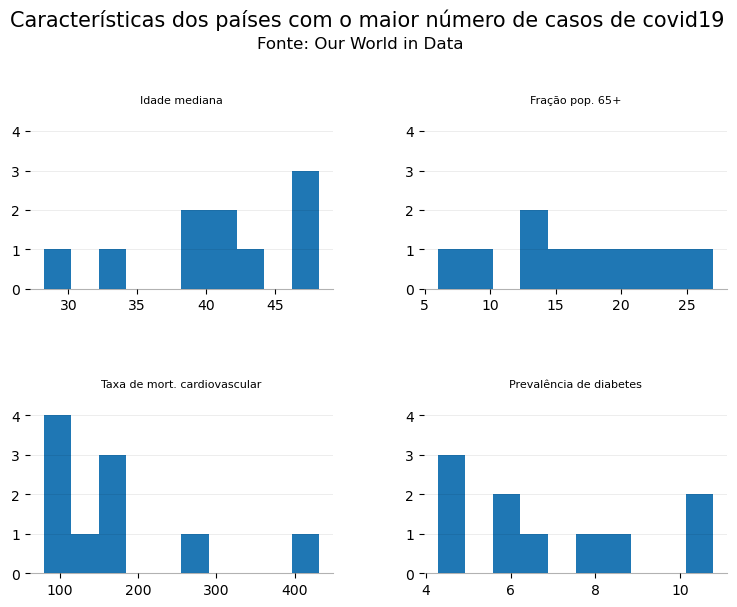

In [35]:
num_rows = 2
num_cols = 2
height = 6
fig, ax = plt.subplots(num_rows,num_cols, figsize=(1.50*height, height))

# Séries a serem plotdas
ax[0,0].hist(df_covid_top10['median_age'],color='#1f77b4',bins=10)
ax[0,1].hist(df_covid_top10['aged_65_older'],color='#1f77b4',bins=10)
ax[1,0].hist(df_covid_top10['cardiovasc_death_rate'],color='#1f77b4',bins=10)
ax[1,1].hist(df_covid_top10['diabetes_prevalence'],color='#1f77b4',bins=10)

ax[0,0].set_title('Idade mediana', fontsize=8, fontweight='light')
ax[0,1].set_title('Fração pop. 65+', fontsize=8, fontweight='light')
ax[1,0].set_title('Taxa de mort. cardiovascular', fontsize=8, fontweight='light')
ax[1,1].set_title('Prevalência de diabetes', fontsize=8, fontweight='light')


for r in range(0,2):
    for c in range(0,2):
        # Visibilidade das bordas
        ax[r,c].spines['top'].set_visible(False)
        ax[r,c].spines['right'].set_visible(False)
        ax[r,c].spines['left'].set_visible(False)
        ax[r,c].spines['bottom'].set_visible(True)
        ax[r,c].spines['bottom'].set_alpha(0.3)

        # Linhas de grid
        ax[r,c].grid(visible=True, which='major',axis='y', ls='-',lw=0.5,c='k',alpha=0.1) 
        
        # Opções do eixo y
        ax[r,c].set_yticks([0,1,2,3,4])
        ax[r,c].set_yticklabels(['0','1','2','3','4'], fontsize=10, fontweight='light')
        ax[r,c].set_ylim(0,4.5)

        
# Ajuste de espaço entre os vários plots
fig.subplots_adjust(hspace = 0.6, wspace = 0.3)

# Título e fonte
plt.suptitle('Características dos países com o maior número de casos de covid19',y=1.05,fontsize=15,fontweight='normal')
plt.text(0, 13.3,'Fonte: Our World in Data',fontsize=12,fontweight='normal')

# Salvar a figura e mostrar o resultado
plt.savefig('carac_covid_all.png', bbox_inches='tight')
plt.show()

# Visualização e _storytelling_

É parte importante do dia-a-dia de um economista - e também de grande parte do profissionais pertencentes ao grupo das ciências sociais aplicadas - ser capaz de comunicar os resultados de uma análise ou pesquisa. E como há muito tempo já se sabe, para comunicar e informar, **uma imagem vale mais do que mil palavras**.

No artigo [_An Economist's Guide to Visualizing Data_](https://pubs.aeaweb.org/doi/pdf/10.1257/jep.28.1.209), publicado no prestigiado _Journal of Economic Perspectives_ em 2014, o autor _Jonathan Schwabish_ fala sobre a importância de construir visualizações e gráficos que de fato chamem a atenção para aquilo que se deseja comunicar. Ele cita três princípios básicos na construção de uma boa visualização gráfica:

1. **Mostre os dados**. O conjunto de dados é o elemento básico por trás da história que se quer contar. Isso não quer dizer que é preciso mostrar todos os dados disponíveis, alguns gráficos mostram demais e acabam sendo pouco informativos. Mostre os dados, mas o faça da forma mais clara possível.


2. **Reduza a sujeira e a desordem gráfica**. O uso de elementos visuais desnecessários ou que distraem, tenderá a reduzir a eficácia do gráfico em comunicar uma mensagem. Pense duas vezes antes de utilizar bordas, linhas de referências muito grossas e escuras, pontos de referência desnecessários nos eixos, cores muito próximas em conjuntos de dados distintos, texturas, etc.


3. **Elementos visuais e textuais devem funcionar de forma integrada**. O gráfico não pode ser poluído de texto e se transformar naquilo que não é, mas elementos textuais podem ajudar bastante na tarefa de chamar a atenção para aquele que é o ponto principal da mensagem. O gráfico deve funcionar como um complemento ao texto, mas ao mesmo tempo deve se sustentar sem ele.


O artigo vai muito além desses 3 princípios básicos e mostra exemplos de visualizações ruins e de como é possível "consertá-las". Há, no entanto, outras várias fontes de informação sobre visualização (esse [link](https://datascience.quantecon.org/applications/visualization_rules.html) é uma ótima referência) e de como construir gráficos e visualizações a partir de uma ideia de _storytelling_, de utilizar dados e ferramentas gráficas para contar uma história e comunicar uma mensagem (o livro [Storytelling com dados](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=sr_1_1_sspa?keywords=storytelling+com+dados&qid=1668636806&qu=eyJxc2MiOiIxLjY5IiwicXNhIjoiMC45NiIsInFzcCI6IjAuNzYifQ%3D%3D&sprefix=story%2Caps%2C557&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1) é outra ótima referência). Em resumo, construir um bom gráfico, uma visualização eficiente, é um trabalho de criatividade e de muita tentativa e erro. Uma determinada visualização pode funcionar muito bem para um certo tipo de dado e não funcionar para outros vários tipos. **Personalização** é a palavra chave nessa árdua tarefa de construir um bom gráfico.